In [58]:
# Version 3.13.7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\nguye\\Downloads\\2025 New Verticals Analytics.csv")

In [24]:
print("----Data Info----")
print(df.info())

print("\n ----Data Sample----")
print(df.head())

----Data Info----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60583 entries, 0 to 60582
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DELIVERY_UUID                   60583 non-null  object 
 1   DELIV_CREATED_AT                60583 non-null  object 
 2   DELIV_STORE_NAME                60583 non-null  object 
 3   DELIV_DASHER_ID                 59574 non-null  float64
 4   DELIV_SUBMARKET                 60583 non-null  object 
 5   DELIV_D2R                       59296 non-null  float64
 6   DELIV_IS_20_MIN_LATE            60583 non-null  int64  
 7   DELIV_CLAT                      58190 non-null  float64
 8   DELIV_CANCELLED_AT              669 non-null    object 
 9   DELIV_MISSING_INCORRECT_REPORT  60583 non-null  bool   
 10  WAS_REQUESTED                   60583 non-null  int64  
 11  WAS_MISSING                     60583 non-null  int64  
 12  WAS_SUBBED    

In [25]:
print('\n--- 1. Missing Values ---')
missing_values = df.isnull().sum() # Missing Values per column
missing_percentage = round(missing_values / len(df) * 100, 2) # % of rows missing

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print("Percentage of missing values in each column:")
print(missing_info[missing_info['Missing Values'] > 0]) #"Missing Values" is allowed bcz it’s the column name  when creating the DataFrame

# Total missing values across entire DataFrame 
total_missing_values = df.isnull().sum().sum() #count of all missing cells
total_percentage_missing= round(total_missing_values/df.size*100, 2 )

print(f'\nTotal missing values: {total_missing_values} {total_percentage_missing}%') 

print('\n--- 2. Dupicated Rows---')

total_duplicated_rows = df.duplicated().sum() #count duplicated rows
duplicated_percentage = round((total_duplicated_rows / len(df)) * 100,2)
print(f'Total duplicated rows: {total_duplicated_rows} {duplicated_percentage}%')

# show the duplicated rows 
print('\nSample duplicated rows:')
print(df[df.duplicated()])


--- 1. Missing Values ---
Percentage of missing values in each column:
                          Missing Values  Percentage (%)
DELIV_DASHER_ID                     1009            1.67
DELIV_D2R                           1287            2.12
DELIV_CLAT                          2393            3.95
DELIV_CANCELLED_AT                 59914           98.90
SUBSTITUTE_ITEM_NAME               57995           95.73
SUBSTITUTE_ITEM_CATEGORY           57995           95.73

Total missing values: 180593 15.69%

--- 2. Dupicated Rows---
Total duplicated rows: 3 0.0%

Sample duplicated rows:
                              DELIVERY_UUID DELIV_CREATED_AT DELIV_STORE_NAME  \
9425   cd169438-1357-44ff-956a-62d551ff6b6a  10/9/2022 23:40         Grocery1   
38292  c34c6ea1-7574-4162-a45f-2bddf3a06b30  9/25/2022 20:32         Grocery1   
44761  8c1f983d-af28-4922-bb64-34c64e6c5012  9/22/2022 22:44         Grocery1   

       DELIV_DASHER_ID DELIV_SUBMARKET  DELIV_D2R  DELIV_IS_20_MIN_LATE  \
9425       

# Missing Values
The blanks in the last three columns DELIV_CANCELLED_AT, SUBSTITUTE_ITEM_NAME & 
CATEGORY are there for a reason and represent specific cases or issues. This is a feature of the 
data, not a quality problem. 
The low percentage of missing data in other columns likely stems from small, random errors during data capture. These gaps are unlikely to affect most analyses. Therefore, I’ve chosen to drop rows where DELIV_DASHER_ID, DELIV_D2R, or DELIV_CLAT are null, as these fields are essential for downstream processing.
# Duplicated Values
After reviewing the duplicated rows, they appear to represent distinct orders associated with the same grocery store (Grocery1). These are not true duplicates, but rather repeated entries tied to different transactions. No action is taken on these rows.


In [26]:
print('\n--- 3. Handling missing Values ---')
df.dropna(axis=0,subset=(['DELIV_DASHER_ID', 'DELIV_D2R', 'DELIV_CLAT']))


--- 3. Handling missing Values ---


,DELIVERY_UUID,DELIV_CREATED_AT,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY
0,9140e853-ea67-4eee-ba76-85fafcc7da6d,10/14/2022 23:59,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Cupcake Pinot Grigio (750 ml),8.99,Alcohol,NaN,NaN
1,9140e853-ea67-4eee-ba76-85fafcc7da6d,10/14/2022 23:59,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Tomato Paste No Salt Added (6 oz),0.90,Pantry,NaN,NaN
2,9140e853-ea67-4eee-ba76-85fafcc7da6d,10/14/2022 23:59,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Pillsbury Ready To Bake! Cookie Dough Chocolat...,4.25,Bakery,NaN,NaN
3,9140e853-ea67-4eee-ba76-85fafcc7da6d,10/14/2022 23:59,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Ultra Pasteurized Heavy Whipping Cream ...,4.05,Dairy & Eggs,NaN,NaN
4,9140e853-ea67-4eee-ba76-85fafcc7da6d,10/14/2022 23:59,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Maruchan Chicken Flavor Ramen Noodle Soup Box ...,3.95,Pantry,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60578,1206ebad-aeda-4f8f-9b8e-5da49966d466,9/15/2022 0:01,DashMart1,10890955.0,Cincinnati,3.100000,0,17.483333,NaN,False,1,0,0,1,Cheryl's Snickerdoodle Cookie (1ct),1.99,Snacks,NaN,NaN
60579,1206ebad-aeda-4f8f-9b8e-5da49966d466,9/15/2022 0:01,DashMart1,10890955.0,Cincinnati,3.100000,0,17.483333,NaN,False,1,0,0,1,DiGiorno Three Meat Rising Crust Pizza (29oz),9.99,Frozen,NaN,NaN
60580,1206ebad-aeda-4f8f-9b8e-5da49966d466,9/15/2022 0:01,DashMart1,10890955.0,Cincinnati,3.100000,0,17.483333,NaN,False,1,0,0,1,Coke Soda Bottle (20 oz),2.59,Drinks,NaN,NaN
60581,b27da6db-b5a9-4307-aff8-678de71aa0a5,9/15/2022 0:00,DashMart1,2163056.0,Cincinnati,6.000000,0,7.783333,NaN,False,1,0,0,1,Haagen-Dazs Ice Cream Bars Vanilla Milk Chocol...,6.49,Ice Cream,NaN,NaN


In [27]:
print("\n--- 3. Statistics info ---")
print(df.describe())


--- 3. Statistics info ---
       DELIV_DASHER_ID     DELIV_D2R  DELIV_IS_20_MIN_LATE    DELIV_CLAT  \
count     5.957400e+04  59296.000000          60583.000000  58190.000000   
mean      1.068842e+07      4.178952              0.047423      4.535178   
std       6.564766e+06     12.389168              0.212543      7.907620   
min       2.172560e+05      0.000000              0.000000      0.050000   
25%       5.250623e+06      0.550000              0.000000      0.283333   
50%       1.013477e+07      2.716667              0.000000      1.500000   
75%       1.665884e+07      5.566667              0.000000      5.616667   
max       2.291942e+07   1313.500000              1.000000    119.783333   

       WAS_REQUESTED   WAS_MISSING    WAS_SUBBED     WAS_FOUND    ITEM_PRICE  
count        60583.0  60583.000000  60583.000000  60583.000000  60583.000000  
mean             1.0      0.062493      0.042718      0.932390      4.969335  
std              0.0      0.242050      0.202223  

In [37]:
# Overall Market
# Overall cancellation rate
cancelled_orders= df['DELIV_CANCELLED_AT'].value_counts().sum()
percentage_cancelled_orders=round(cancelled_orders/len(df)*100,2)
print(f'Overall of cancellation rate: {cancelled_orders} orders, {percentage_cancelled_orders}%')

# Overall late delivery rate 
late_delivery_orders = df['DELIV_IS_20_MIN_LATE'].sum() # Boolean 0/1
percentage_late_delivery = round(late_delivery_orders/len(df)*100,2)
print(f'Overall of 20 mins late delivery rate: {late_delivery_orders} orders, {percentage_late_delivery}%')

# Overall Order Missing Rate 
missing_incorrect_orders=df['DELIV_MISSING_INCORRECT_REPORT'].sum() # Boolean 0/1
percentage_missing_rate = round(missing_incorrect_orders/len(df)*100,2)
print(f'Overall rate of missing or incorrect orders rate: {missing_incorrect_orders} orders, {percentage_missing_rate}%')

Overall of cancellation rate: 669 orders, 1.1%
Overall of 20 mins late delivery rate: 2873 orders, 4.74%
Overall rate of missing or incorrect orders rate: 1530 orders, 2.53%


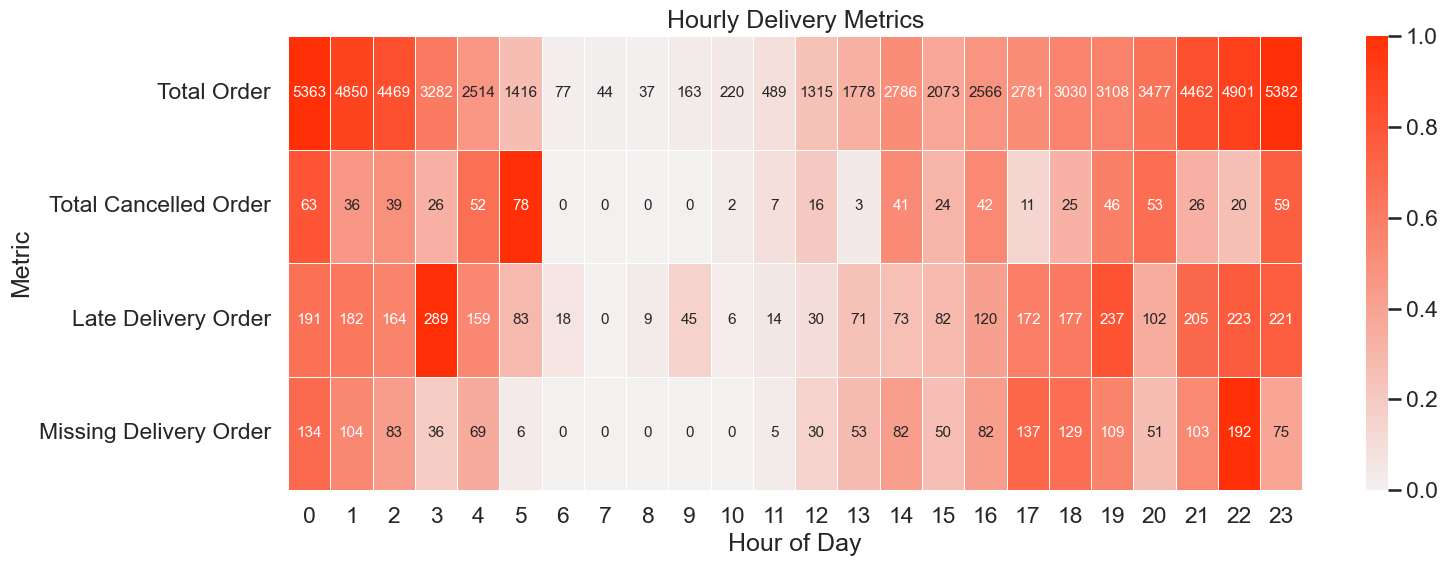

In [62]:
# Total orders and Issue per order per hour

# Convert to datetime
df['order_time'] = pd.to_datetime(df['DELIV_CREATED_AT'])

# Extract time only
df['order_clock'] = df['order_time'].dt.hour

# Order by order_clock
order_counts_hour = df.groupby('order_clock')['DELIVERY_UUID'].count().sort_index()
cancelled_orders_hour = df.groupby('order_clock')['DELIV_CANCELLED_AT'].count().sort_index()
late_delivery_orders_hour = df.groupby('order_clock')['DELIV_IS_20_MIN_LATE'].sum().sort_index()
missing_incorrect_orders_hour=df.groupby('order_clock')['DELIV_MISSING_INCORRECT_REPORT'].sum().sort_index()

df_hourly = pd.DataFrame({
    'Total Order': order_counts_hour,
    'Total Cancelled Order': cancelled_orders_hour,
    'Late Delivery Order': late_delivery_orders_hour,
    'Missing Delivery Order': missing_incorrect_orders_hour
})

heatmap_data = df_hourly.T  # Transpose: metrics as rows, hours as columns
row_normalized = heatmap_data.div(heatmap_data.max(axis=1), axis=0) # Optional: normalize each row for color scaling
plt.figure(figsize=(16, 6))
sns.heatmap(row_normalized, annot=heatmap_data.astype(int), fmt='d',
            cmap=sns.light_palette("#FF3008", as_cmap=True), linewidths=0.5,annot_kws={"size": 11})

plt.title('Hourly Delivery Metrics')
plt.xlabel('Hour of Day')
plt.ylabel('Metric')
plt.tight_layout()
plt.show()

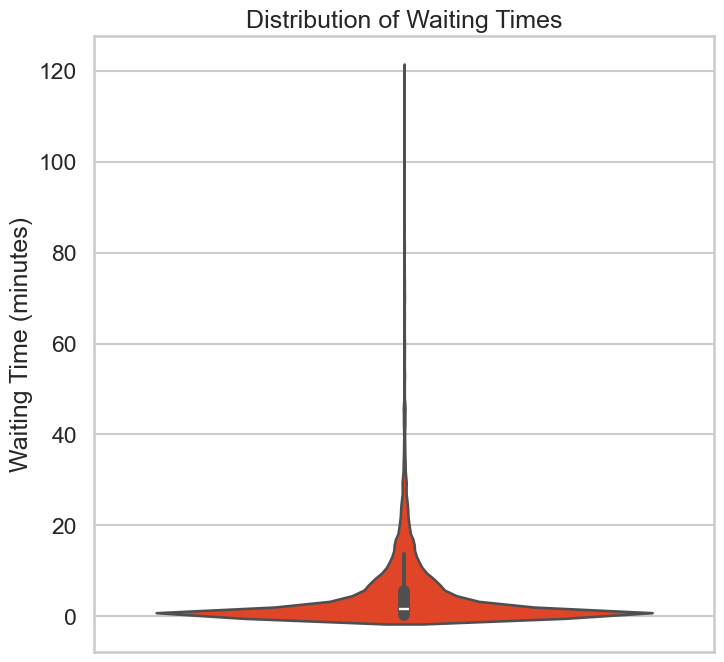

In [50]:
plt.figure(figsize=(8,8))
sns.violinplot(y=df['DELIV_CLAT'],color="#FF3008")
plt.title('Distribution of Waiting Times')
plt.ylabel('Waiting Time (minutes)')
plt.tight_layout
plt.show()

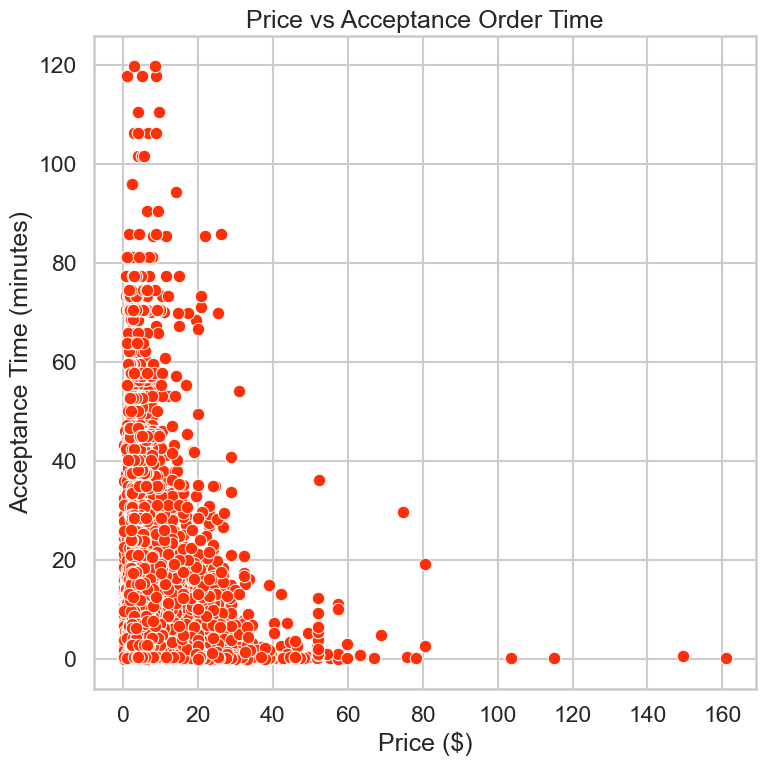

In [51]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['ITEM_PRICE'], y=df['DELIV_CLAT'], color="#FF3008")
plt.title('Price vs Acceptance Order Time')
plt.xlabel('Price ($)')
plt.ylabel('Acceptance Time (minutes)')
plt.tight_layout()
plt.show()

In [43]:
correlation = df['ITEM_PRICE'].corr(df['DELIV_CLAT'])
print(f"Correlation: {correlation:.2f}")

Correlation: -0.01


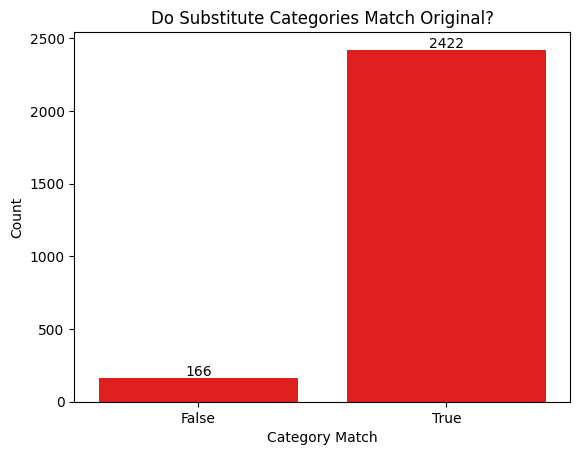

In [50]:
subbed = df[df['WAS_SUBBED'] == 1].copy()

# Category match bar chart
subbed['CATEGORY_MATCH'] = subbed['ITEM_CATEGORY'] == subbed['SUBSTITUTE_ITEM_CATEGORY']
ax = sns.countplot(x='CATEGORY_MATCH', data=subbed,color="red")
plt.title('Do Substitute Categories Match Original?')
plt.xlabel('Category Match')
plt.ylabel('Count')
# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 10,  # adjust vertical position
        s=f'{height:.0f}',  # format as integer
        ha='center'
    )
plt.show()

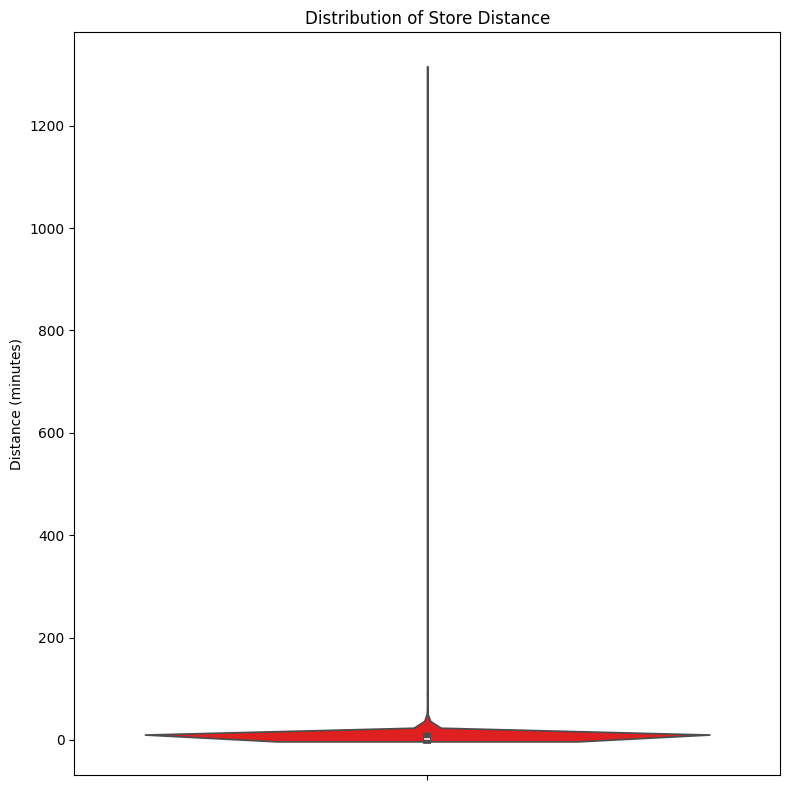

In [53]:
plt.figure(figsize=(8,8))
sns.violinplot(y=df['DELIV_D2R'], color="red")
plt.title('Distribution of Store Distance')
plt.ylabel('Distance (minutes)')
plt.tight_layout()
plt.show()

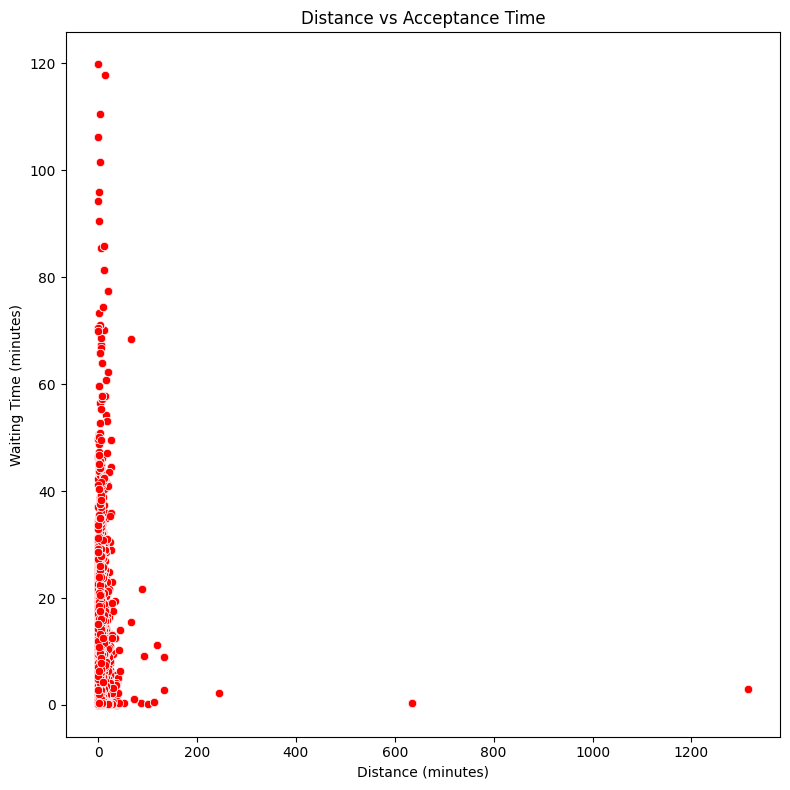

In [56]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['DELIV_D2R'], y=df['DELIV_CLAT'], color="red")
plt.title('Distance vs Acceptance Time')
plt.xlabel('Distance (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.tight_layout()
plt.show()

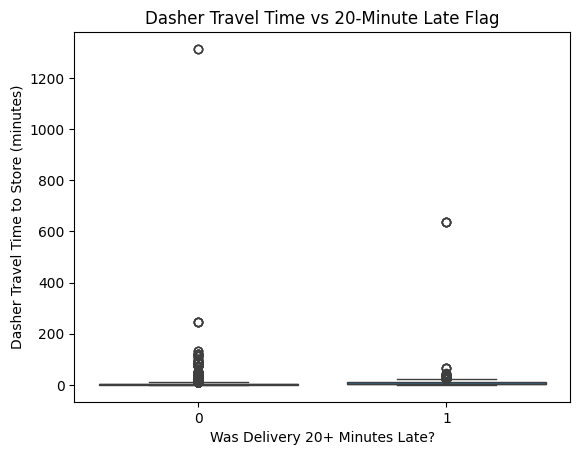

In [57]:
sns.boxplot(x='DELIV_IS_20_MIN_LATE', y='DELIV_D2R', data=df)
plt.title('Dasher Travel Time vs 20-Minute Late Flag')
plt.xlabel('Was Delivery 20+ Minutes Late?')
plt.ylabel('Dasher Travel Time to Store (minutes)')
plt.show()

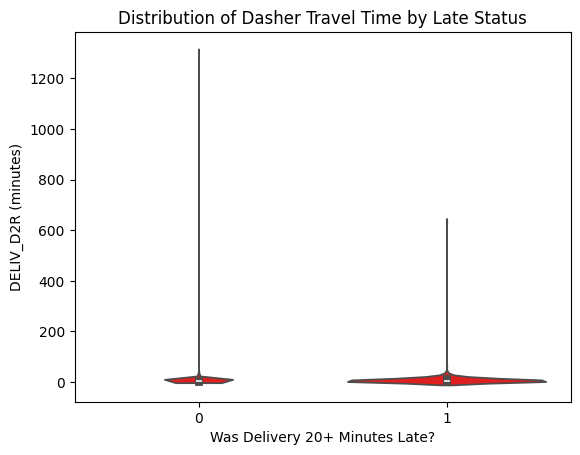

In [59]:
sns.violinplot(x='DELIV_IS_20_MIN_LATE', y='DELIV_D2R', data=df, color="red")
plt.title('Distribution of Dasher Travel Time by Late Status')
plt.xlabel('Was Delivery 20+ Minutes Late?')
plt.ylabel('DELIV_D2R (minutes)')
plt.show()

In [60]:
issue_summary = df.groupby('DELIV_DASHER_ID').agg({
    'DELIV_IS_20_MIN_LATE': 'sum',
    'DELIV_MISSING_INCORRECT_REPORT': 'sum'
}).reset_index()

# Add total issue count
issue_summary['total_issues'] = issue_summary['DELIV_IS_20_MIN_LATE'] + issue_summary['DELIV_MISSING_INCORRECT_REPORT']

# Sort and get top 6
top_dashers = issue_summary.sort_values(by='total_issues', ascending=False).head(6)

print(top_dashers)

      DELIV_DASHER_ID  DELIV_IS_20_MIN_LATE  DELIV_MISSING_INCORRECT_REPORT  \
269         2446877.0                    46                              55   
530         5456278.0                    24                              61   
897         9254445.0                    60                              12   
80          1073782.0                    30                              27   
1383       14873072.0                    30                              17   
715         7009550.0                    35                               9   

      total_issues  
269            101  
530             85  
897             72  
80              57  
1383            47  
715             44  


In [67]:
# Step 1: Filter rows where WAS_MISSING == 1
Mex_missing = df[df['WAS_MISSING'] == 1].copy()

# Step 2: Group by store and count missing/incorrect reports
Mex_issue_summary = df.groupby('DELIV_STORE_NAME').agg({
    'WAS_MISSING': 'sum',
     'WAS_SUBBED': 'sum',
     'DELIVERY_UUID': 'count'
}).reset_index()

print(Mex_issue_summary)

  DELIV_STORE_NAME  WAS_MISSING  WAS_SUBBED  DELIVERY_UUID
0        DashMart1           78          38          34349
1         Grocery1         2620        1817          17726
2         Grocery2          962         657           7534
3         Grocery3          126          76            974


In [81]:
items_order = df.groupby(['ITEM_CATEGORY']).agg({
    'DELIVERY_UUID': 'count'
}).reset_index()

top_items_order=items_order.sort_values(by=['ITEM_CATEGORY'], ascending=False).head(10)
print(top_items_order)

         ITEM_CATEGORY  DELIVERY_UUID
26            Vitamins             20
25  Storage & Cleaning            102
24              Snacks           9525
23             Produce           3926
22            Pet Care            806
21       Personal Care           1289
20              Pantry           7163
19       Multicultural              2
18            Medicine            467
17         Meat & Fish           1851


In [80]:
# Assuming top_items_order has columns: ITEM_NAME, ITEM_CATEGORY, DELIVERY_UUID
plt.figure(figsize=(10, 6))

# Bubble chart
plt.scatter(
    x=top_items_order['ITEM_CATEGORY'],
    s=top_items_order['DELIVERY_UUID'] * 10,  # scale bubble size
    alpha=0.6,
    c='skyblue',
    edgecolors='gray',
    linewidth=1.5
)

plt.title('Top 5 Ordered Items by Category')
plt.xlabel('Item Name')
plt.ylabel('Item Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 1000x600 with 0 Axes>